# Preprocesamiento de datos

### Lectura de Dataframes

In [ ]:
import pandas as pd
import numpy as np
import os

In [2]:
raw_2020 = 'data/raw/DATOS HISTÓRICOS 2020_2021_TODAS ESTACIONES.xlsx'
raw_2022 = 'data/raw/DATOS HISTÓRICOS 2022_2023_TODAS ESTACIONES.xlsx'
raw_2023 = 'data/raw/DATOS HISTÓRICOS 2023_2024_TODAS ESTACIONES_ITESM.xlsx'
raw_2024 = 'data/raw/DATOS HISTÓRICOS 2024_TODAS ESTACIONES.xlsx'
raw_2025 = 'data/raw/DATOS HISTÓRICOS 2025_TODAS ESTACIONES.xlsx'

nombre_zona = ['NORTE', 'SUR', 'CENTRO']
nombre_hoja= ['NO','SUR','CE']

limpieza_1=[raw_2020,raw_2022]
limpieza_2=[raw_2024,raw_2025]

### Limpieza 1: Se eligen las hojas con los nombres ['NORTE', 'SUR', 'CENTRO']


In [3]:
def limpieza1(datos_array):
    datos_limpios=[]

    for archivo in datos_array:
        datos_por_hoja = pd.read_excel(archivo, sheet_name=nombre_zona)

        for zona, df in datos_por_hoja.items():
            df['Zona'] = zona # Usamos la nueva variable local 'zona'

        data_combinada = pd.concat(datos_por_hoja.values(), ignore_index=True)
        datos_limpios.append(data_combinada)
    
    return datos_limpios

datos_limpios_20_22 = limpieza1(limpieza_1)

datos_limpios_20=datos_limpios_20_22[0]
datos_limpios_22=datos_limpios_20_22[1]


### Limpieza 2: Se eligen las hojas ['NO','SUR','CE']


In [ ]:
mapa_zona = {
    'NO': 'NORTE',
    'SUR': 'SUR',
    'CE': 'CENTRO'  
}

nombre_hoja = list(mapa_zona.keys()) 

def limpieza2(datos_array, sheet_names_map):    
    datos_limpios = []

    for archivo in datos_array:
        # Valores: DataFrame de cada hoja
        datos_por_hoja = pd.read_excel(archivo, sheet_name=nombre_hoja)

        # Lista para guardar los DFs limpios de *este* archivo
        dfs_del_archivo = []

        # Itera sobre cada hoja leída
        for nombre_hoja_actual, df_original in datos_por_hoja.items():
            
            # Asumimos que las filas 0 y 1 son cabeceras o unidades
            df_limpio = df_original.iloc[2:].reset_index(drop=True)

            # Busca el nombre de la hoja (ej. 'NO') en el mapa
            valor_zona = sheet_names_map[nombre_hoja_actual]
            df_limpio['Zona'] = valor_zona
            
            # Agrega el DF limpio a la lista de este archivo
            dfs_del_archivo.append(df_limpio)

        # Concatena todos los DFs limpios (NORTE, SUR, CENTRO) de *este* archivo
        data_combinada = pd.concat(dfs_del_archivo, ignore_index=True)
        datos_limpios.append(data_combinada)
    
    return datos_limpios

datos_limpios_24_25 = limpieza2(limpieza_2, mapa_zona)

datos_limpios_24=datos_limpios_24_25[0]

datos_limpios_25=datos_limpios_24_25[1]
datos_limpios_25.iloc[1:]

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,Zona
1,2025-01-01 02:00:00,2,2.3,8.1,10.4,30,81.0,NaN,715,0,NaN,7.3,0,NaN,0.6,122,NORTE
2,2025-01-01 03:00:00,1.8,2.4,9.7,12,24,64.0,NaN,714.9,0,NaN,4.6,0,NaN,2.5,157,NORTE
3,2025-01-01 04:00:00,2.57,7.3,13.2,20.4,16,68.0,NaN,714.8,0,NaN,4,0,NaN,1.6,201,NORTE
4,2025-01-01 05:00:00,2.39,6.5,15,21.5,4,113.0,NaN,715,0,NaN,3.3,0,NaN,6.8,258,NORTE
5,2025-01-01 06:00:00,1.91,2.6,12.3,14.9,7,85.0,NaN,715.4,0,NaN,3.1,0,NaN,3.4,271,NORTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13022,2025-06-30 19:00:00,1.45,5.8,14.8,20.6,11,15.0,5.68,710.7,0,88,2.6,0.021,21.77,9.3,66,CENTRO
13023,2025-06-30 20:00:00,1.41,4.4,15,19.4,11,18.0,7.41,711,0,88,2.5,0,21.73,9.9,63,CENTRO
13024,2025-06-30 21:00:00,1.39,2.8,13.4,16.2,13,15.0,3.49,711.3,0,88,2.5,0,21.56,7.9,69,CENTRO
13025,2025-06-30 22:00:00,1.27,2.4,8.9,11.3,16,16.0,3.24,711.4,0,88,2.4,0,21.42,7.3,74,CENTRO


In [ ]:
mapa_nombres = {
    'Fecha y hora': 'date',
    'CO (ppm)': 'CO',
    'NO (ppb)': 'NO',
    'NO2 (ppb)': 'NO2',
    'NOX (ppb)': 'NOX',
    'O3 (ppb)': 'O3',
    'PM10 (ug/m3)': 'PM10',
    'PM2.5 (ug/m3)': 'PM2.5',
    'PRS (mmHg)': 'PRS',
    'RAINF (mm/h)': 'RAINF',
    'RH (%)': 'RH',
    'SO2 (ppb)': 'SO2',
    'SR (kW/m2)': 'SR',
    'TOUT (ºC)': 'TOUT',
    'WSR (km/h)': 'WSR',
    'WDR (azimutal)': 'WDR',
    'Zona': 'Zona'  }

datos_limpios_24.rename(columns=mapa_nombres, inplace=True)

### Limpieza 3:

In [6]:
data_2023 = pd.read_excel(raw_2023, sheet_name="Param_horarios_Estaciones", header=[0, 1])
data_2023 = data_2023.rename(columns={'Unnamed: 0': 'Info', 'date': 'date'})
data_2023.columns = data_2023.columns.set_names(['Estacion', 'Medicion'])
data_2023.head()
    

Estacion   Unnamed: 0_level_0 SURESTE                                       \
Medicion   Unnamed: 0_level_1      CO    NO   NO2   NOX   O3   PM10  PM2.5   
0                        date     ppm   ppb   ppb   ppb  ppb  ug/m3  ug/m3   
1         2023-01-01 00:00:00    2.37  54.5  32.6  87.1    3    110     68   
2         2023-01-01 01:00:00    2.12  38.7  30.3  68.9    3    116  67.18   
3         2023-01-01 02:00:00    2.05  38.7  28.8  67.4    3    117  75.12   
4         2023-01-01 03:00:00     2.5  60.5  29.1  89.4    3    135  82.81   

Estacion                ... NOROESTE 3                                        \
Medicion    PRS  RAINF  ...       PM10  PM2.5    PRS  RAINF   RH  SO2     SR   
0          mmhg  mm/hr  ...      ug/m3  ug/m3   mmhg  mm/hr    %  ppb  KW/m2   
1         721.7      0  ...        NaN    NaN    NaN    NaN  NaN  NaN    NaN   
2         721.5      0  ...        246    NaN  707.4      0   59  2.9      0   
3         721.1      0  ...        239    NaN    707      0   59  3.2      0   
4         720.8      0  ...        275    NaN  706.8      0   59  2.3      0   

Estacion                    
Medicion   TOUT   WSR  WDR  
0          degC  KMPH  DEG  
1           NaN   NaN  NaN  
2         14.14  65.3   95  
3         14.11  60.9   90  
4         14.08  58.1   84  

[5 rows x 240 columns]

In [7]:
zonas_filtradas = ['NORTE', 'SUR', 'CENTRO']
columnas_a_mantener = [(('Unnamed: 0_level_0', 'Unnamed: 0_level_1'))] + \
                      [col for col in data_2023.columns if col[0] in zonas_filtradas]

# Aplicar el filtro
datos_limpios_2023_corregido = data_2023[columnas_a_mantener].copy()
datos_limpios_2023_corregido.head()

Estacion   Unnamed: 0_level_0 CENTRO                                      \
Medicion   Unnamed: 0_level_1     CO   NO   NO2   NOX   O3   PM10  PM2.5   
0                        date    ppm  ppb   ppb   ppb  ppb  ug/m3  ug/m3   
1         2023-01-01 00:00:00   1.67  4.1  30.3  34.5    9    118  94.12   
2         2023-01-01 01:00:00    1.7    5  28.9  34.1    9     97  96.79   
3         2023-01-01 02:00:00   1.51  4.3  23.2  27.7   11    103  81.23   
4         2023-01-01 03:00:00    1.3  3.8  20.9  24.9   11     83  49.83   

Estacion                ...    SUR                                             \
Medicion    PRS  RAINF  ...  PM2.5    PRS  RAINF  RH  SO2     SR   TOUT   WSR   
0          mmhg  mm/hr  ...  ug/m3   mmhg  mm/hr   %  ppb  KW/m2   degC  KMPH   
1         718.4      0  ...     36  712.1      0  64  2.4      0  15.05   1.2   
2         710.7      0  ...     51  711.9      0  69  2.5  0.001  14.23   2.2   
3         710.4      0  ...     57  711.5      0  73  2.5  0.001   13.5   2.1   
4         710.1      0  ...     39  711.2      0  70  2.5  0.001  13.23   3.2   

Estacion             
Medicion  WDR WDR.1  
0         DEG   NaN  
1         251   NaN  
2         275   NaN  
3         235   NaN  
4         181   NaN  

[5 rows x 49 columns]

In [8]:
df_para_unpivot = datos_limpios_2023_corregido.set_index(('Unnamed: 0_level_0', 'Unnamed: 0_level_1'))
df_para_unpivot.index.name = 'date'

df_unpivoted = df_para_unpivot.stack(level=0)
#Limpiar el DataFrame reseteando el índice
df_unpivoted_final = df_unpivoted.reset_index()
df_unpivoted_final=df_unpivoted_final.iloc[3:]
# Limpiar el nombre del índice de columnas
df_unpivoted_final.columns.name = None
# Renombrar la columna 'Estacion' a 'Zona' como tenías en tus otras limpiezas
datos_limpios_23 = df_unpivoted_final.rename(columns={'Estacion': 'Zona'})
datos_limpios_23.head()

/var/folders/0p/t_nmy1zs1jgc_z9_lggdxk7m0000gn/T/ipykernel_2483/197867326.py:4: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_unpivoted = df_para_unpivot.stack(level=0)


,date,Zona,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDV,WDV.1,WDR,WDR.1
3,2023-01-01 00:00:00,CENTRO,1.67,4.1,30.3,34.5,9,118,94.12,718.4,0,45,3.3,0,17.65,4.9,236,NaN,NaN,NaN
4,2023-01-01 00:00:00,NORTE,7.46,130.4,43.2,173.5,12,522,369.16,715.7,0,NaN,4.2,0,17.05,3.8,18,NaN,NaN,NaN
5,2023-01-01 00:00:00,SUR,2.04,7.2,136.1,143.3,6,56,36,712.1,0,64,2.4,0,15.05,1.2,NaN,NaN,251,NaN
6,2023-01-01 01:00:00,CENTRO,1.7,5,28.9,34.1,9,97,96.79,710.7,0,47,3.4,0.001,17.12,3.4,336,NaN,NaN,NaN
7,2023-01-01 01:00:00,NORTE,4.16,56.2,41.1,97.2,9,712,299.29,715.5,0,NaN,4,0,15.87,4.5,15,NaN,NaN,NaN


In [9]:
columnas_estandar = [
    'date', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'PRS', 
    'RAINF', 'RH', 'SO2', 'SR', 'TOUT', 'WSR', 'WDR', 'Zona','WDV'
]
datos_limpios_23 = datos_limpios_23.reindex(columns=columnas_estandar)
datos_limpios_23

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,Zona,WDV
3,2023-01-01 00:00:00,1.67,4.1,30.3,34.5,9,118,94.12,718.4,0,45,3.3,0,17.65,4.9,NaN,CENTRO,236
4,2023-01-01 00:00:00,7.46,130.4,43.2,173.5,12,522,369.16,715.7,0,NaN,4.2,0,17.05,3.8,NaN,NORTE,18
5,2023-01-01 00:00:00,2.04,7.2,136.1,143.3,6,56,36,712.1,0,64,2.4,0,15.05,1.2,251,SUR,NaN
6,2023-01-01 01:00:00,1.7,5,28.9,34.1,9,97,96.79,710.7,0,47,3.4,0.001,17.12,3.4,NaN,CENTRO,336
7,2023-01-01 01:00:00,4.16,56.2,41.1,97.2,9,712,299.29,715.5,0,NaN,4,0,15.87,4.5,NaN,NORTE,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41441,2024-07-31 20:00:00,0.57,4.2,10.5,14.6,14,97,NaN,713.1,0,57,3.7,0.002,27.28,10.1,172,SUR,NaN
41442,2024-07-31 21:00:00,0.59,1.9,6,8.2,23,90,31.75,711.2,0,50,2.7,0.001,28.62,15.9,NaN,CENTRO,127
41443,2024-07-31 21:00:00,0.78,2.2,7,9.2,12,96,24,717.3,0,NaN,2.6,0,27.59,12.2,NaN,NORTE,130
41444,2024-07-31 22:00:00,0.57,1.9,5.9,8,22,85,33.73,711.7,0,50,2.7,0.001,28,11.5,NaN,CENTRO,118


In [10]:
datos_limpios_23['WDR'] = datos_limpios_23['WDR'].fillna(datos_limpios_23['WDV'])
columnas_a_eliminar = ['WDV', 'WDR.1', 'WDV.1']
datos_limpios_23.drop(columns=columnas_a_eliminar, inplace=True, errors='ignore')

/var/folders/0p/t_nmy1zs1jgc_z9_lggdxk7m0000gn/T/ipykernel_2483/2912945838.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_limpios_23['WDR'] = datos_limpios_23['WDR'].fillna(datos_limpios_23['WDV'])


### Check de Datos limpios

In [11]:
print("2020", datos_limpios_20.shape)
print("2022", datos_limpios_22.shape)
print("2023", datos_limpios_23.shape)
print("2024", datos_limpios_24.shape)
print("2025", datos_limpios_25.shape)

2020 (52606, 17)
2022 (42764, 17)
2023 (41443, 17)
2024 (26343, 17)
2025 (13027, 17)


In [12]:
print("20", datos_limpios_20.columns)
print("22", datos_limpios_22.columns)
print("23", datos_limpios_23.columns)
print("24", datos_limpios_24.columns)
print("25", datos_limpios_25.columns)

20 Index(['date', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'PRS', 'RAINF',
       'RH', 'SO2', 'SR', 'TOUT', 'WSR', 'WDR', 'Zona'],
      dtype='object')
22 Index(['date', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'PRS', 'RAINF',
       'RH', 'SO2', 'SR', 'TOUT', 'WSR', 'WDR', 'Zona'],
      dtype='object')
23 Index(['date', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'PRS', 'RAINF',
       'RH', 'SO2', 'SR', 'TOUT', 'WSR', 'WDR', 'Zona'],
      dtype='object')
24 Index(['date', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'PRS', 'RAINF',
       'RH', 'SO2', 'SR', 'TOUT', 'WSR', 'WDR', 'Zona'],
      dtype='object')
25 Index(['date', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'PRS', 'RAINF',
       'RH', 'SO2', 'SR', 'TOUT', 'WSR', 'WDR', 'Zona'],
      dtype='object')


#### Guardamos

In [13]:
output_dir = "data/interim"

print(f"Guardando archivos en {output_dir}...")
datos_limpios_20.to_csv(f"{output_dir}/datos_limpios_2020.csv", index=False)
datos_limpios_22.to_csv(f"{output_dir}/datos_limpios_2022.csv", index=False)
datos_limpios_23.to_csv(f"{output_dir}/datos_limpios_2023.csv", index=False)
datos_limpios_24.to_csv(f"{output_dir}/datos_limpios_2024.csv", index=False)
datos_limpios_25.to_csv(f"{output_dir}/datos_limpios_2025.csv", index=False)


Guardando archivos en data/interim...


### Union de df

In [ ]:
lista_dfs = [
    datos_limpios_20,
    datos_limpios_22,
    datos_limpios_23,
    datos_limpios_24,
    datos_limpios_25
]

columnas_especiales = ['date', 'Zona']

for df in lista_dfs:
    columnas_a_convertir = df.columns.drop(columnas_especiales)
    for col in columnas_a_convertir:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

data_combinada_final = pd.concat(lista_dfs, ignore_index=True)
data_combinada_final

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,Zona
0,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,52.0,49.71,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NORTE
1,2020-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,53.0,46.70,715.1,0.0,88.0,NaN,0.002,11.14,1.3,3.0,NORTE
2,2020-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,59.0,44.42,714.1,0.0,88.0,NaN,0.002,11.35,1.3,119.0,NORTE
3,2020-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,60.0,46.84,713.8,0.0,88.0,NaN,0.002,11.52,1.3,110.0,NORTE
4,2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,59.0,33.15,713.3,0.0,88.0,NaN,0.002,11.52,NaN,110.0,NORTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176178,2025-06-30 19:00:00,1.45,5.8,14.8,20.6,11.0,15.0,5.68,710.7,0.0,88.0,2.6,0.021,21.77,9.3,66.0,CENTRO
176179,2025-06-30 20:00:00,1.41,4.4,15.0,19.4,11.0,18.0,7.41,711.0,0.0,88.0,2.5,0.000,21.73,9.9,63.0,CENTRO
176180,2025-06-30 21:00:00,1.39,2.8,13.4,16.2,13.0,15.0,3.49,711.3,0.0,88.0,2.5,0.000,21.56,7.9,69.0,CENTRO
176181,2025-06-30 22:00:00,1.27,2.4,8.9,11.3,16.0,16.0,3.24,711.4,0.0,88.0,2.4,0.000,21.42,7.3,74.0,CENTRO


In [15]:
data_combinada_final.shape

(176183, 17)

In [16]:
data_combinada_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176183 entries, 0 to 176182
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    176183 non-null  datetime64[ns]
 1   CO      146975 non-null  float64       
 2   NO      142876 non-null  float64       
 3   NO2     145914 non-null  float64       
 4   NOX     147796 non-null  float64       
 5   O3      148128 non-null  float64       
 6   PM10    168138 non-null  float64       
 7   PM2.5   130824 non-null  float64       
 8   PRS     161204 non-null  float64       
 9   RAINF   164852 non-null  float64       
 10  RH      147390 non-null  float64       
 11  SO2     144871 non-null  float64       
 12  SR      172096 non-null  float64       
 13  TOUT    157182 non-null  float64       
 14  WSR     163951 non-null  float64       
 15  WDR     152615 non-null  float64       
 16  Zona    176183 non-null  object        
dtypes: datetime64[ns](1), float64

### Eliminacion de duplicados

In [ ]:
duplicates_combination = data_combinada_final.duplicated(subset=['date', 'Zona']).sum()

print(f"\n--- Comprobación 1: Duplicados por (Fecha + Zona) ---")
print(f"Número de registros con la misma 'date' y misma 'Zona': {duplicates_combination}")

#Verificación de filas completamente idénticas
#Esto busca filas donde todos los valores (CO, NO, O3, ..., Zona) son exactos
full_row_duplicates = df.duplicated().sum()

print(f"\n--- Comprobación 2: Filas completamente idénticas ---")
print(f"Número de filas totalmente idénticas (todos los valores): {full_row_duplicates}")


--- Comprobación 1: Duplicados por (Fecha + Zona) ---
Número de registros con la misma 'date' y misma 'Zona': 31685

--- Comprobación 2: Filas completamente idénticas ---
Número de filas totalmente idénticas (todos los valores): 0


In [ ]:
df_cleaned = data_combinada_final.drop_duplicates(subset=['date', 'Zona'], keep='first')
rows_removed = data_combinada_final.shape[0] - df_cleaned.shape[0]

# 5. Sobrescribir el DataFrame original
df = df_cleaned.copy()

print(f"Se encontraron y eliminaron {rows_removed} duplicados (por fecha + zona).")
print(f"Número de filas después de la limpieza: {df.shape[0]}")

# (Opcional) Verificar que ya no hay duplicados
duplicates_remaining = df.reset_index().duplicated(subset=['date', 'Zona']).sum()
print(f"Verificación: Duplicados restantes = {duplicates_remaining}")

Se encontraron y eliminaron 31685 duplicados (por fecha + zona).
Número de filas después de la limpieza: 144498
Verificación: Duplicados restantes = 0


In [ ]:
output_dir = "data/interim"

print(f"Guardando archivos en {output_dir}...")
df.to_csv(f"{output_dir}/data_limpios.csv", index=False)

Guardando archivos en data/processed...


## Dataframe unificado
* Años 2020-2025
* Zonas: Centro, Norte y Sur

In [ ]:
df

Decidimos quedarnos con CO, NO2, PM2.5


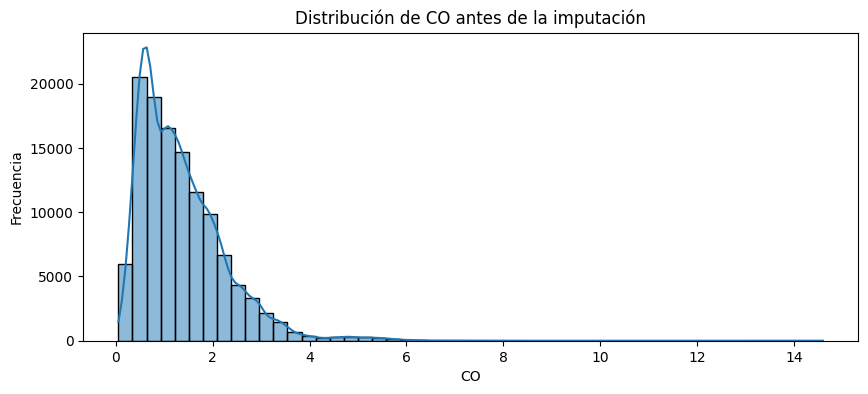

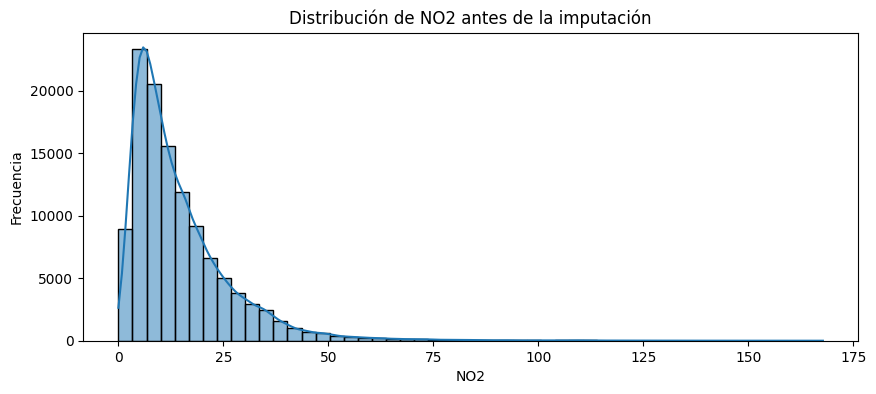

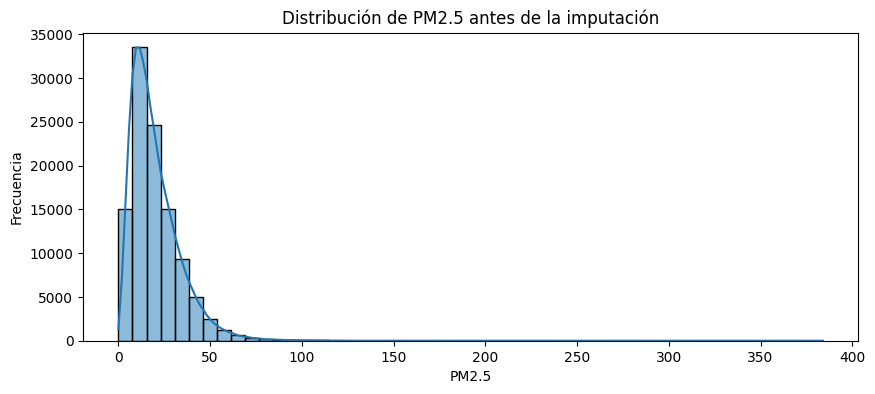

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cols=['CO', 'NO2','PM2.5']

for col in cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col].dropna(), bins=50, kde=True)
    plt.title(f'Distribución de {col} antes de la imputación')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()  

Creamos otra dataframe con los datos que queremos

In [25]:
df_comp = pd.DataFrame(df, columns=cols)
df_comp

,CO,NO2,PM2.5
0,NaN,NaN,49.71
1,NaN,NaN,46.70
2,NaN,NaN,44.42
3,NaN,NaN,46.84
4,NaN,NaN,33.15
...,...,...,...
176178,1.45,14.8,5.68
176179,1.41,15.0,7.41
176180,1.39,13.4,3.49
176181,1.27,8.9,3.24


## Imputacion de datos